## Explore the data set

In [1]:
# import libraries
import pandas as pd
import numpy as np
#read in dataframe 
cars = pd.read_csv('imports-85.data')
#view the data
cars.head()

,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.60,...,130,mpfi,3.47,2.68,9.00,111,5000,21,27,13495
0,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
1,1,?,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
2,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950
3,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450
4,2,?,audi,gas,std,two,sedan,fwd,front,99.8,...,136,mpfi,3.19,3.40,8.5,110,5500,19,25,15250


In [2]:
#fix the column names
cols = ['symboling', 'normalized-losses', 'make', 'fuel-type', 'aspiration', 'num-of-doors', 'body-style', 
        'drive-wheels', 'engine-location', 'wheel-base', 'length', 'width', 'height', 'curb-weight', 'engine-type', 
        'num-of-cylinders', 'engine-size', 'fuel-system', 'bore', 'stroke', 'compression-rate', 'horsepower', 'peak-rpm', 'city-mpg', 'highway-mpg', 'price']
# reset our cars df with specific names
cars = pd.read_csv('imports-85.data',names=cols)
# check the df
cars.head()

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-rate,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,?,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450


In [3]:
# idenify all the numerical columns
numeric_cols = ['normalized-losses', 'wheel-base', 'length', 'width', 'height', 'curb-weight', 'bore', 'stroke', 'compression-rate', 'horsepower', 'peak-rpm', 'city-mpg', 'highway-mpg', 'price']
numeric_cars = cars[numeric_cols]
# Check the dataframe
numeric_cars.head()

,normalized-losses,wheel-base,length,width,height,curb-weight,bore,stroke,compression-rate,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,?,88.6,168.8,64.1,48.8,2548,3.47,2.68,9.0,111,5000,21,27,13495
1,?,88.6,168.8,64.1,48.8,2548,3.47,2.68,9.0,111,5000,21,27,16500
2,?,94.5,171.2,65.5,52.4,2823,2.68,3.47,9.0,154,5000,19,26,16500
3,164,99.8,176.6,66.2,54.3,2337,3.19,3.40,10.0,102,5500,24,30,13950
4,164,99.4,176.6,66.4,54.3,2824,3.19,3.40,8.0,115,5500,18,22,17450


## Data Cleaning

In [4]:
## First, let's replace all the ? values to Nan
numeric_cars = numeric_cars.replace("?",np.nan)
# check the dataframe
numeric_cars.head()

,normalized-losses,wheel-base,length,width,height,curb-weight,bore,stroke,compression-rate,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,NaN,88.6,168.8,64.1,48.8,2548,3.47,2.68,9.0,111,5000,21,27,13495
1,NaN,88.6,168.8,64.1,48.8,2548,3.47,2.68,9.0,111,5000,21,27,16500
2,NaN,94.5,171.2,65.5,52.4,2823,2.68,3.47,9.0,154,5000,19,26,16500
3,164,99.8,176.6,66.2,54.3,2337,3.19,3.40,10.0,102,5500,24,30,13950
4,164,99.4,176.6,66.4,54.3,2824,3.19,3.40,8.0,115,5500,18,22,17450


In [5]:
# convert all column values to float
numeric_cars = numeric_cars.astype('float')
#check the missing values
numeric_cars.isnull().sum()

normalized-losses    41
wheel-base            0
length                0
width                 0
height                0
curb-weight           0
bore                  4
stroke                4
compression-rate      0
horsepower            2
peak-rpm              2
city-mpg              0
highway-mpg           0
price                 4
dtype: int64

In [6]:
# we can remove any rows contain missing value in price column because that's our target column for prediction
numeric_cars = numeric_cars.dropna(subset=['price'])
# check again for nan values 
numeric_cars.isnull().sum()

normalized-losses    37
wheel-base            0
length                0
width                 0
height                0
curb-weight           0
bore                  4
stroke                4
compression-rate      0
horsepower            2
peak-rpm              2
city-mpg              0
highway-mpg           0
price                 0
dtype: int64

In [7]:
# replace all the other values with the mean value of each columns
numeric_cars = numeric_cars.fillna(numeric_cars.mean())
# final checking for any missing values
numeric_cars.isnull().sum()

normalized-losses    0
wheel-base           0
length               0
width                0
height               0
curb-weight          0
bore                 0
stroke               0
compression-rate     0
horsepower           0
peak-rpm             0
city-mpg             0
highway-mpg          0
price                0
dtype: int64

In [8]:
# Normalize all values except for price between 0 to 1
col_price = numeric_cars['price']
numeric_cars = (numeric_cars - numeric_cars.min())/(numeric_cars.max()-numeric_cars.min())
numeric_cars['price'] = col_price
# view the dataframe
numeric_cars.head()

,normalized-losses,wheel-base,length,width,height,curb-weight,bore,stroke,compression-rate,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,0.298429,0.058309,0.413433,0.324786,0.083333,0.411171,0.664286,0.290476,0.1250,0.294393,0.346939,0.222222,0.289474,13495.0
1,0.298429,0.058309,0.413433,0.324786,0.083333,0.411171,0.664286,0.290476,0.1250,0.294393,0.346939,0.222222,0.289474,16500.0
2,0.298429,0.230321,0.449254,0.444444,0.383333,0.517843,0.100000,0.666667,0.1250,0.495327,0.346939,0.166667,0.263158,16500.0
3,0.518325,0.384840,0.529851,0.504274,0.541667,0.329325,0.464286,0.633333,0.1875,0.252336,0.551020,0.305556,0.368421,13950.0
4,0.518325,0.373178,0.529851,0.521368,0.541667,0.518231,0.464286,0.633333,0.0625,0.313084,0.551020,0.138889,0.157895,17450.0


## Univariate Model

In [9]:
# import the libraries
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error
# write a function that takes feature column, target column and dataframe
# to perform the univartiate k-nearest neighbors model.
def knn_train_test(feature_col,target_col,df):
    knn = KNeighborsRegressor()
    np.random.seed(1)
    
    #shuffle the order of rows
    shuffled_index = np.random.permutation(df.index)
    rand_df = df.reindex(shuffled_index)
    
    #idenify the last train row
    last_train_index = int(len(rand_df)/2)
    # setting up train and test sets
    train_set = rand_df[:last_train_index]
    test_set = rand_df[last_train_index:]
    # fit the knn model with train's feature and target column
    knn.fit(train_set[[feature_col]],train_set[target_col])
    # make a prediction
    prediction = knn.predict(test_set[[feature_col]])
    # calculate the mean squared error and muliply it by 1/2 to get rmsi
    mse = mean_squared_error(prediction,test_set[target_col])
    rmse = np.sqrt(mse)
    return rmse
k_rmse_results = {}
train_cols = numeric_cars.columns.drop('price')
# apply the function to all columns except price
for col in train_cols:
    rmse_val = knn_train_test(col,'price',numeric_cars)
    k_rmse_results[col] = rmse_val
# turn it to pd.Series
k_rmse_results = pd.Series(k_rmse_results)
# sort the Series
k_rmse_results = k_rmse_results.sort_values()

# view the series
k_rmse_results

horsepower           4037.037713
curb-weight          4401.118255
highway-mpg          4630.026799
width                4704.482590
city-mpg             4766.422505
length               5427.200961
wheel-base           5461.553998
compression-rate     6610.812153
bore                 6780.627785
normalized-losses    7330.197653
peak-rpm             7697.459696
stroke               8006.529545
height               8144.441043
dtype: float64

In [17]:
# Modify our function to use k values 1, 3, 5, 7 and 9
def knn_train_test(feature_col, target_col, df):
    np.random.seed(1)
    
    # Shuffle the order of rows
    shuffled_index = np.random.permutation(df.index)
    rand_df = df.reindex(shuffled_index)
    
    # idenify the last index row of train_set
    last_train = int(len(rand_df)/2)
    # create train and test sets
    train_set = rand_df.iloc[:last_train]
    test_set = rand_df.iloc[last_train:]
    # create k values
    k_values = [1,3,5,7,9]
    k_rmses = {}
    for k in k_values:
        # create the model with k number of n_neighbors
        knn = KNeighborsRegressor(n_neighbors=k)
        # fit the model with train[[feature]] and train[target]
        knn.fit(train_set[[feature_col]],train_set[target_col])
        # preform perdiction with test[[feature]]
        prediction = knn.predict(test_set[[feature_col]])
        # calculate the rmse 
        mse = mean_squared_error(test_set[target_col],prediction)
        rmse = np.sqrt(mse)
        k_rmses[k] = rmse
    return k_rmses
k_rmse_results = {}
feature_columns = numeric_cars.columns.drop('price')
for col in feature_columns:
    rmses = knn_train_test(col,'price',numeric_cars)
    k_rmse_results[col] = rmses
# view the result
k_rmse_results

{'bore': {1: 8602.58848450066,
  3: 6984.239489480916,
  5: 6780.627784685976,
  7: 6878.097965921532,
  9: 6866.808502038413},
 'city-mpg': {1: 5901.143574354764,
  3: 4646.746408727155,
  5: 4766.422505090134,
  7: 5232.523034167316,
  9: 5465.209492527533},
 'compression-rate': {1: 8087.205346523092,
  3: 7375.063685578359,
  5: 6610.812153159129,
  7: 6732.801282941515,
  9: 7024.485525463435},
 'curb-weight': {1: 5264.290230758878,
  3: 5022.318011757233,
  5: 4401.118254793124,
  7: 4330.608104418053,
  9: 4632.044474454401},
 'height': {1: 8904.04645636071,
  3: 8277.609643045525,
  5: 8144.441042663747,
  7: 7679.598124393773,
  9: 7811.03606291223},
 'highway-mpg': {1: 6025.594966720739,
  3: 4617.305019788554,
  5: 4630.026798588056,
  7: 4796.061440186946,
  9: 5278.358056953987},
 'horsepower': {1: 4170.054848037801,
  3: 4020.8492630885394,
  5: 4037.0377131537603,
  7: 4353.811860277134,
  9: 4515.135617419103},
 'length': {1: 4628.45550121557,
  3: 5129.8358210721635,
  

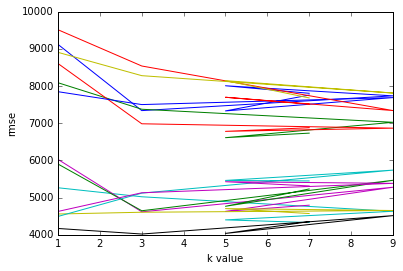

In [18]:
# graph the result
import matplotlib.pyplot as plt
%matplotlib inline
for k,v in k_rmse_results.items():
    x = list(v.keys())
    y = list(v.values())
    
    plt.plot(x,y)
    plt.xlabel('k value')
    plt.ylabel('rmse')

## Multivariate Model

In [12]:
# let's first find the average rmse for each features in k_rmse_results.items()
feature_avg_rmse = {}
for k,v in k_rmse_results.items():
    avg_rmse = np.mean(list(v.values()))
    feature_avg_rmse[k] = avg_rmse
feature_avg_rmse = pd.Series(feature_avg_rmse)
print(feature_avg_rmse.sort_values())

horsepower           4219.377860
width                4618.910560
curb-weight          4730.075815
highway-mpg          5069.469256
length               5176.394904
city-mpg             5202.409003
wheel-base           5252.392462
compression-rate     7166.073599
bore                 7222.472445
normalized-losses    7624.407151
stroke               8000.240467
peak-rpm             8119.365233
height               8163.346266
dtype: float64


In [13]:
# modify the previous model to accept multivariables with the default k value
def knn_train_test(feature_cols, target_col, df):
    np.random.seed(1)
    
    # Shuffle the order of rows
    shuffled_index = np.random.permutation(df.index)
    rand_df = df.reindex(shuffled_index)
    
    # idenify the last index row of train_set
    last_train = int(len(rand_df)/2)
    # create train and test sets
    train_set = rand_df.iloc[:last_train]
    test_set = rand_df.iloc[last_train:]
    # create k values
    k_values = [5]
    k_rmses = {}
    for k in k_values:
        # create the model with k number of n_neighbors
        knn = KNeighborsRegressor(n_neighbors=k)
        # fit the model with train[features] and train[target]
        knn.fit(train_set[feature_cols],train_set[target_col])
        # preform perdiction with test[features]
        prediction = knn.predict(test_set[feature_cols])
        # calculate the rmse 
        mse = mean_squared_error(prediction,test_set[target_col])
        rmse = np.sqrt(mse)
        k_rmses[k] = rmse
    return k_rmses

k_rmse_results ={}

best_two_feat = ['horsepower','width']
rmse_val = knn_train_test(best_two_feat,'price',numeric_cars)
k_rmse_results["best_two_feat"] = rmse_val

best_three_feat = ['horsepower','width','curb-weight']
rmse_val = knn_train_test(best_three_feat,'price',numeric_cars)
k_rmse_results["best_three_feat"] = rmse_val

best_four_feat = ['horsepower','width','curb-weight','highway-mpg']
rmse_val = knn_train_test(best_four_feat,'price',numeric_cars)
k_rmse_results["best_four_feat"] = rmse_val

best_five_feat = ['horsepower','width','curb-weight','highway-mpg','length']
rmse_val = knn_train_test(best_five_feat,'price',numeric_cars)
k_rmse_results["best_five_feat"] = rmse_val

best_six_feat = ['horsepower','width','curb-weight','highway-mpg','length','city-mpg']
rmse_val = knn_train_test(best_six_feat,'price',numeric_cars)
k_rmse_results["best_six_feat"] = rmse_val


k_rmse_results


{'best_five_feat': {5: 3665.546673045813},
 'best_four_feat': {5: 3358.6915801682458},
 'best_six_feat': {5: 3628.261188214127},
 'best_three_feat': {5: 3305.9401397969677},
 'best_two_feat': {5: 3589.3132622073304}}

We found that three best features give us the lowest rmse value

## Hyperparameter Tuning

For the top 3 models : best_three_feat, best_four_feat, best_two_feat
we apply hyperparameter value from 1 to 25 and plot the resulting RMSE values.

In [19]:
# modify our function
def knn_train_test(feature_cols, target_col, df):
    #set random seed
    np.random.seed(1)
    #shuffle the order of rows in the df
    shuffled_index = np.random.permutation(df.index)
    rand_df = df.reindex(shuffled_index)
    # define train and test sets
    last_train = int(len(rand_df)/2)
    train_set = rand_df.iloc[:last_train]
    test_set = rand_df.iloc[last_train:]
    # define our hyperparameter from 1 to 25
    k_values = [i for i in range(1,26)]
    k_rmses ={}
    for k in k_values:
        knn = KNeighborsRegressor(n_neighbors=k)
        knn.fit(train_set[feature_cols],train_set[target_col])
        prediction = knn.predict(test_set[feature_cols])
        # calculate the rmse values
        mse = mean_squared_error(prediction,test_set[target_col])
        rmse = np.sqrt(mse)
        k_rmses[k] = rmse
    return k_rmses
# apply the function to the top 3 models
k_rmse_results = {}

best_two_feat = ['horsepower','width']
rmse_val = knn_train_test(best_two_feat,'price',numeric_cars)
k_rmse_results["best_two_feat"] = rmse_val

best_three_feat = ['horsepower','width','curb-weight']
rmse_val = knn_train_test(best_three_feat,'price',numeric_cars)
k_rmse_results["best_three_feat"] = rmse_val

best_four_feat = ['horsepower','width','curb-weight','highway-mpg']
rmse_val = knn_train_test(best_four_feat,'price',numeric_cars)
k_rmse_results["best_four_feat"] = rmse_val

k_rmse_results
    

{'best_four_feat': {1: 2600.746383728188,
  2: 2725.4325072335123,
  3: 3108.8580314362966,
  4: 3217.3135209486827,
  5: 3358.6915801682458,
  6: 3633.1687033129465,
  7: 3896.127441396644,
  8: 4002.8383900652543,
  9: 4055.5309369929582,
  10: 4128.67807741542,
  11: 4249.827289347268,
  12: 4344.035898237492,
  13: 4402.995293166156,
  14: 4424.314365328619,
  15: 4442.943179452285,
  16: 4528.57927503009,
  17: 4572.28806185627,
  18: 4604.034045947238,
  19: 4660.524954508328,
  20: 4735.352015758023,
  21: 4742.329532242572,
  22: 4763.606459864159,
  23: 4807.076030845482,
  24: 4848.127192424658,
  25: 4873.610609928121},
 'best_three_feat': {1: 3013.0109985241875,
  2: 2813.285969825997,
  3: 3171.585284478674,
  4: 3182.3137417981943,
  5: 3305.9401397969677,
  6: 3522.506848900376,
  7: 3774.3772094554106,
  8: 3978.969124021116,
  9: 3992.923680588881,
  10: 4076.2381473803043,
  11: 4156.388331131807,
  12: 4201.10713385948,
  13: 4303.62676861325,
  14: 4359.693296989702

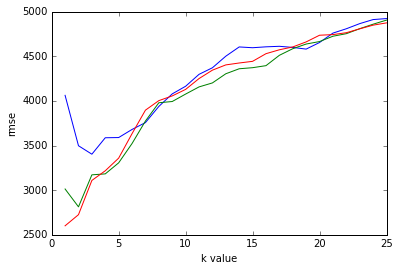

In [20]:
# plot the graph
for k,v in k_rmse_results.items():
    x = list(v.keys())
    y = list(v.values())
    
    plt.plot(x,y)
    plt.xlabel('k value')
    plt.ylabel('rmse')

As we can see, the rmse is lowest when we are using the best four features with the k value of 1.